# Rap Verse Generator

## import libraries

In [2]:
import numpy as np
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import Dense, Dropout, Bidirectional, Embedding
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
import tensorflow.keras.utils as ku
import matplotlib.pyplot as plt

## data load

In [3]:
## Kendrick Lamar Lyrics Data Set
data = open('KL_Rap.txt').read()

print(data[:500])

What's your life about? Enlighten me
Is you gon' live on your knees or die on your feet?
There's fire in the street, fire in the swisher
Fire in between the two legs of your lil' sister
Just get a sip of this elixir
Before they crop us out the picture
I've never seen a crop circle
But I've cops circle the block, I puff squares
But I swear one day I'ma stop, my nerves itch
On the brink of my career while my peers struggle for employment
Can you hear these screams? (Uncle Sam ain't no killing me)



## data preprocessing

In [4]:
from keras.preprocessing.text import text_to_word_sequence
tokenizer = Tokenizer()
y = text_to_word_sequence(data)
max_sequence_len = len(y)
# print(max_sequence_len)
tokenizer.fit_on_texts(y)
encoded_docs = tokenizer.texts_to_matrix(y, mode = 'count')

# print(tokenizer.word_index)
# print(encoded_docs)

In [5]:
vocab = set(y)

word_to_index = {w: i for i, w in enumerate(vocab)}
index_to_word = {i: w for w, i in word_to_index.items()}
word_indices = [word_to_index[word] for word in vocab]
vocab_size = len(vocab)
print('vocabulary size: {}'.format(vocab_size))

vocabulary size: 4849


In [8]:
tokenizer = Tokenizer()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

## creating input sequences
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
#     print("token_list:\n ",token_list)
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
#         print("n_gram:\n ",n_gram_sequence)
        input_sequences.append(n_gram_sequence)
        
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding='pre'))

predictors, label = input_sequences[:,:-1], input_sequences[:,-1]

label = ku.to_categorical(label, num_classes = total_words)

In [50]:
input_sequences[:,-1].shape

(36587,)

In [11]:
print(predictors.shape)
print(label.shape)

(36587, 23)
(36587, 4850)


## model

In [59]:
model = Sequential()

model.add(Embedding(total_words, 100, input_length = max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 23, 100)           485000    
                                                                 
 bidirectional_4 (Bidirectio  (None, 23, 300)          301200    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 23, 300)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100)               160400    
                                                                 
 dense_8 (Dense)             (None, 2425)              244925    
                                                                 
 dense_9 (Dense)             (None, 4850)              11766100  
                                                      

## model train

In [63]:
history = model.fit(predictors, label, epochs = 100)

Epoch 1/100
1144/1144 [==============================] - 14s 12ms/step - loss: 2.8594 - accuracy: 0.4529
Epoch 2/100
1144/1144 [==============================] - 14s 12ms/step - loss: 2.8174 - accuracy: 0.4603
Epoch 3/100
1144/1144 [==============================] - 14s 12ms/step - loss: 2.7869 - accuracy: 0.4657
Epoch 4/100
1144/1144 [==============================] - 14s 13ms/step - loss: 2.7553 - accuracy: 0.4745
Epoch 5/100
1144/1144 [==============================] - 14s 12ms/step - loss: 2.7194 - accuracy: 0.4815
Epoch 6/100
1144/1144 [==============================] - 14s 12ms/step - loss: 2.6897 - accuracy: 0.4837
Epoch 7/100
1144/1144 [==============================] - 13s 11ms/step - loss: 2.6615 - accuracy: 0.4915
Epoch 8/100
1144/1144 [==============================] - 13s 12ms/step - loss: 2.6312 - accuracy: 0.4959
Epoch 9/100
1144/1144 [==============================] - 14s 12ms/step - loss: 2.5939 - accuracy: 0.5087
Epoch 10/100
1144/1144 [==============================]

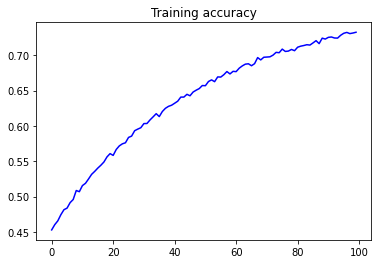

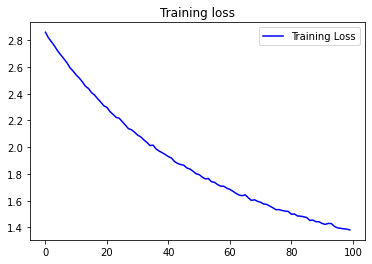

In [64]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [65]:
seed_text = "I did it"
next_words = 500
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

I did it all 'cause it feel good niggas this oh never ever wake up wit' it people the projects gave her an explanation bitch ayy all in love got rich because i got bitches okay enough to the morning time of this house that dap vents hell fuckin' with a guarantee village five foot loud i'm is huey newton going stupid and be shows that's an eyes work fire crazy in the mirror there be could move you feel now okay do a bitch nigga what you want to do with my finger got ya will bring no body or go he gon' lose in your pockets gonna sin again by this shit that you're miseducated losin' it another nigga 'bout do to those person be in the homies i'll be bothered fill up one or turned one real gave the night fuck god ain't impress me in your name in this way too say god never like friends fill room with being an option writer probably ok that nigga bitch love your mother collect be out inside off fear some york fitted jordan reason got an automatic weapon sit your feelings you ever forget ya bo